# Data Science II: Machine Learning para la Ciencia de Datos #

<font size=5> Análisis de dataset: Ataques al corazón y su relación con condiciones de riesgo

<font size=3>Micaela Elizabeth Rios

## <font size=5> Carga de datos e Import de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


##  Archivo CSV en Gitgub
df = pd.read_csv('https://raw.githubusercontent.com/MicaelaER/Data-Science-II/refs/heads/main/heart_attack_dataset.csv')


In [59]:
# Info acerca de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [60]:
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [61]:
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


## <font size=5> Gráficos para interpretar el dataset

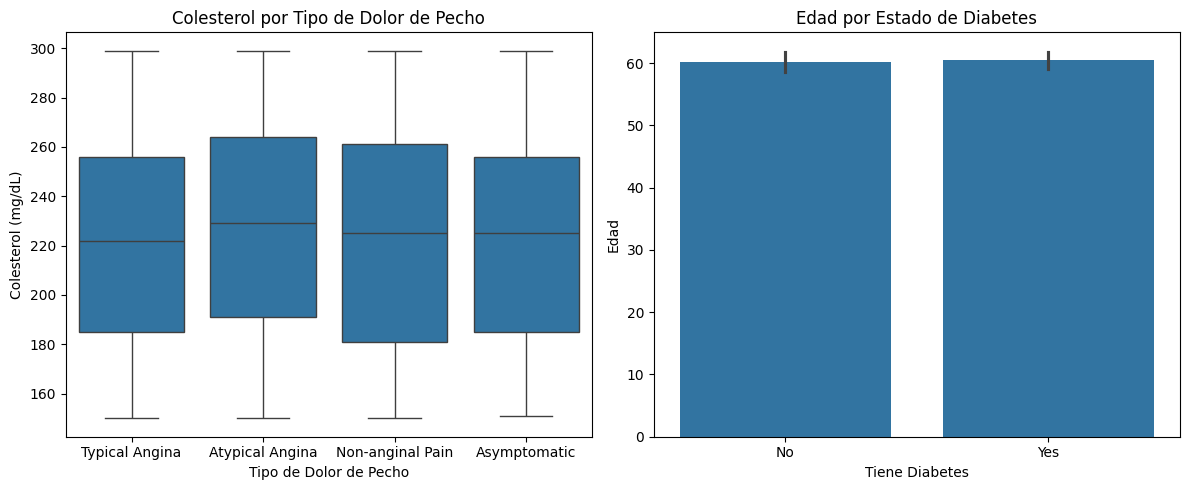

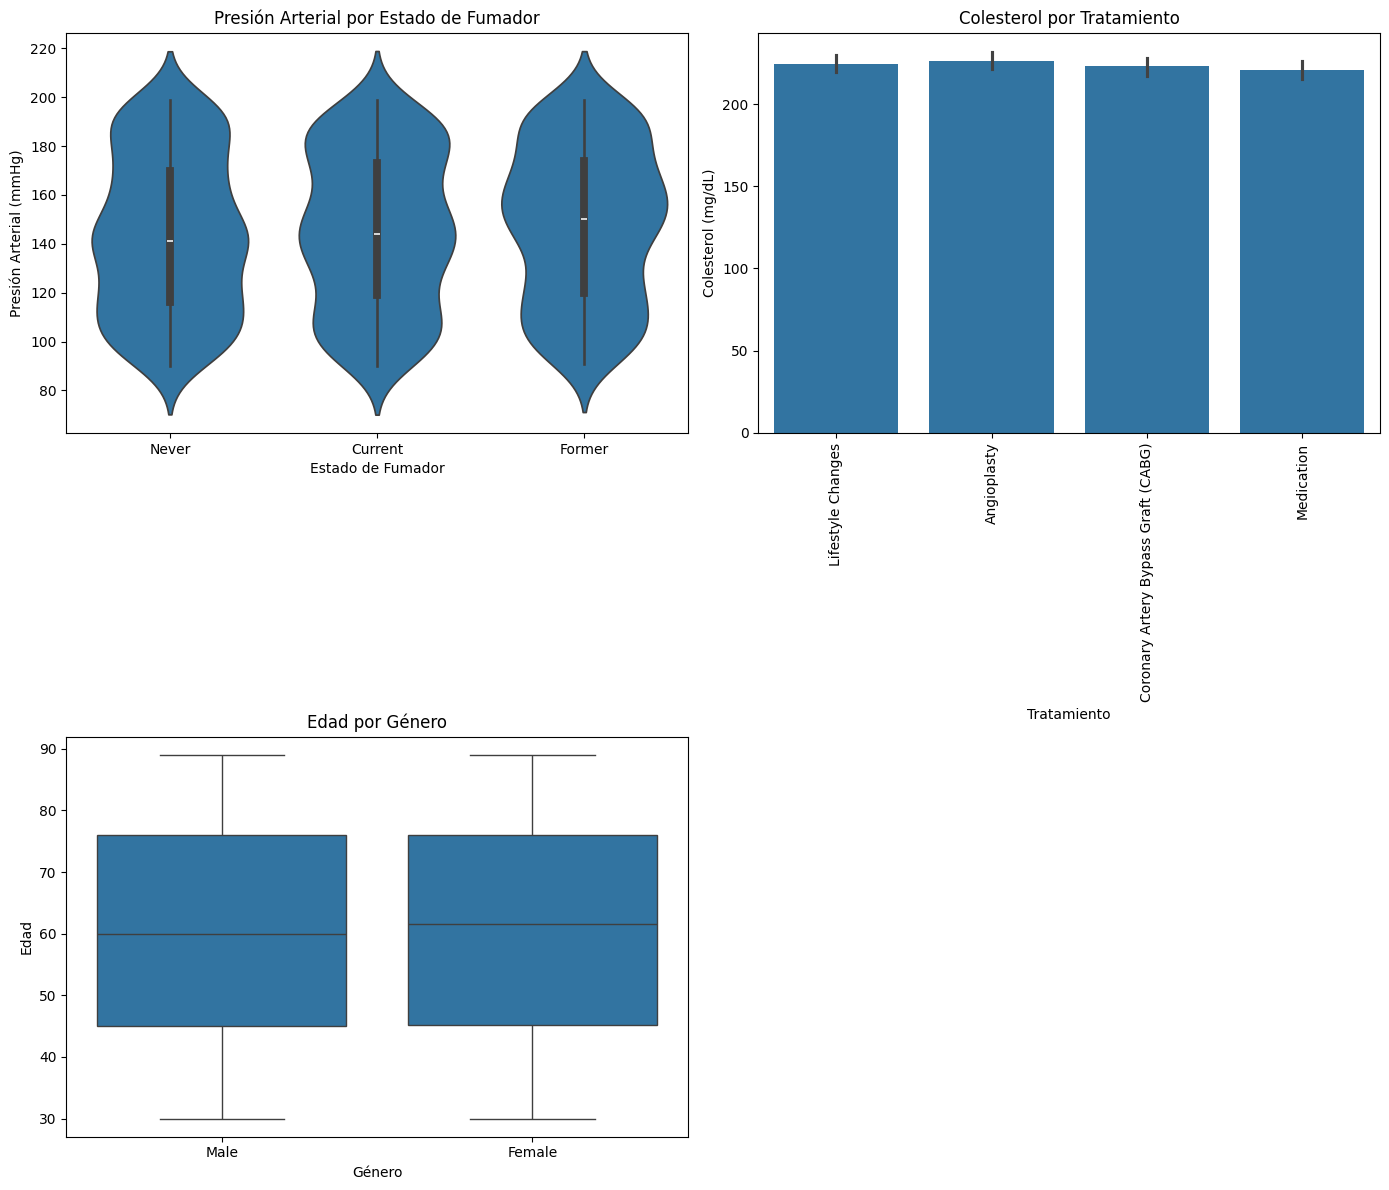

In [62]:
# Gráficos con Matplotlib
plt.figure(figsize=(12,5 ))

# Gráfico 2: Colesterol por tipo de dolor de pecho
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Chest Pain Type', y='Cholesterol (mg/dL)')
plt.title('Colesterol por Tipo de Dolor de Pecho')
plt.xlabel('Tipo de Dolor de Pecho')
plt.ylabel('Colesterol (mg/dL)')

# Gráfico 3: Edad por estado de diabetes
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Has Diabetes', y='Age')
plt.title('Edad por Estado de Diabetes')
plt.xlabel('Tiene Diabetes')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

# Gráficos con Seaborn
plt.figure(figsize=(14, 12))

# Gráfico 4: Presión arterial por estado de fumador
plt.subplot(2, 2, 1)
sns.violinplot(data=df, x='Smoking Status', y='Blood Pressure (mmHg)')
plt.title('Presión Arterial por Estado de Fumador')
plt.xlabel('Estado de Fumador')
plt.ylabel('Presión Arterial (mmHg)')

# Gráfico 5: Colesterol por tratamiento
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Treatment', y='Cholesterol (mg/dL)')
plt.title('Colesterol por Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Colesterol (mg/dL)')
plt.xticks(rotation=90)

# Gráfico 6: Edad por género
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()


## <font size=5> Objetivo del entrenamiento y estudio.

<font size=3> Vamos a analizar e intentar interpretar cómo impactan ciertas condiciones y factores de riesgo en la posibilidad de tener un ataque cardíaco, sobre todo personas de edad más avanzada. De esta forma poder brindar o acercar información a quienes cumplan los mismos requisitos que quienes hayan sido incluidos en la población encuestada para el estudio.


## <font size=5> EDA

Codificamos los datos en formatos de texto a números para poder ingresarlos en los modelos para entrenar.

In [63]:
column=['Gender','Has Diabetes','Smoking Status','Chest Pain Type','Treatment']

df[column] = df[column].apply(LabelEncoder().fit_transform)

df.head

<bound method NDFrame.head of      Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes   
0         1   70                    181                  262             0  \
1         0   55                    103                  253             1   
2         1   42                     95                  295             1   
3         1   84                    106                  270             0   
4         1   86                    187                  296             1   
..      ...  ...                    ...                  ...           ...   
995       1   42                    125                  193             1   
996       1   80                    186                  267             1   
997       0   64                    108                  174             1   
998       0   84                    123                  195             0   
999       1   61                    155                  197             0   

     Smoking Status  Chest Pain T

En los dos valores que presentan mayor posibilidad de variabilidad y amplitud no muestran presencia de outliners, por lo que podríamos avanzar de recortar cuantiles.

<Axes: ylabel='Blood Pressure (mmHg)'>

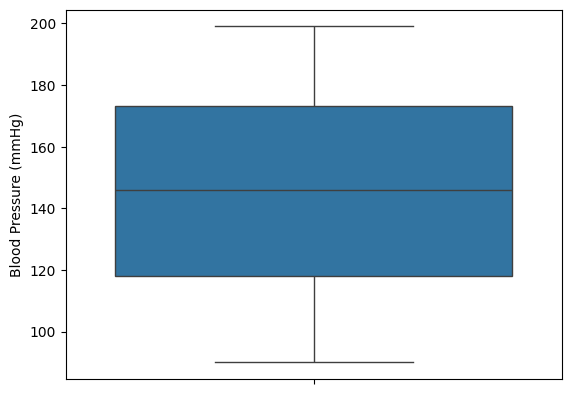

In [64]:
sns.boxplot(data=df['Blood Pressure (mmHg)'])


<Axes: ylabel='Cholesterol (mg/dL)'>

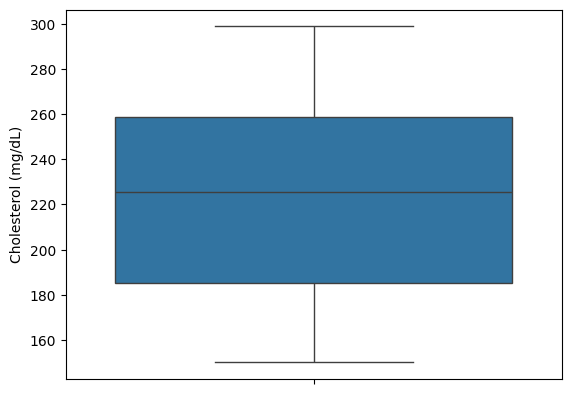

In [65]:
sns.boxplot(data=df['Cholesterol (mg/dL)'])

In [66]:
X = df.drop('Has Diabetes',axis=1)
Y = df['Has Diabetes']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=45)

Vamos a analizar cuales son los modelos que vamos a probar mediante el entrenamiento que hemos realizado, con el análisis en base a la diabetes como condición para predecir un ataque al corazón.

* Random Forest
- El modelo de Random Forest es muy robusto y preciso porque combina múltiples árboles de decisión. Esto permite manejar datos complejos con relaciones no lineales y características interactivas. Además, al promediar los resultados de varios árboles, reduce el riesgo de sobreajuste (overfitting). Si obtenemos un buen F1 Score con este modelo, significa que está capturando bien las relaciones entre los datos, y la matriz de confusión debería mostrar un buen equilibrio entre las clases positivas y negativas.

* Logistic Regression
- La regresión logística es un modelo sencillo y fácil de interpretar, ideal para análisis exploratorios. Es eficiente computacionalmente y funciona bien cuando las relaciones entre las características y la variable objetivo son aproximadamente lineales. Si el F1 Score es moderado, sugiere que el modelo es útil pero puede no capturar todas las complejidades de los datos. La matriz de confusión ayudaría a ver si el modelo tiene problemas con clases desbalanceadas.

* XGBoost
- Es conocido por su alta precisión y rendimiento, especialmente en competiciones de machine learning. Es flexible y permite ajustar muchos hiperparámetros para optimizar su rendimiento. Además, maneja bien los datos desbalanceados. Si obtebemos un alto F1 Score con XGBoost, indica que el modelo está capturando bien las relaciones complejas en los datos. La matriz de confusión debería mostrar una buena capacidad para predecir ambas clases, incluso si hay desbalanceo.

Random Forest
F1 Score:  0.4768211920529801


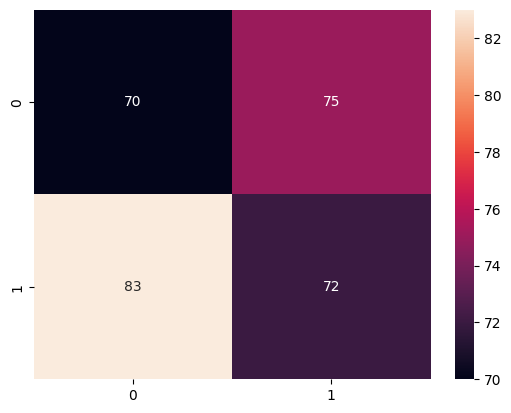

Logistic Regression
F1 Score:  0.4764705882352941


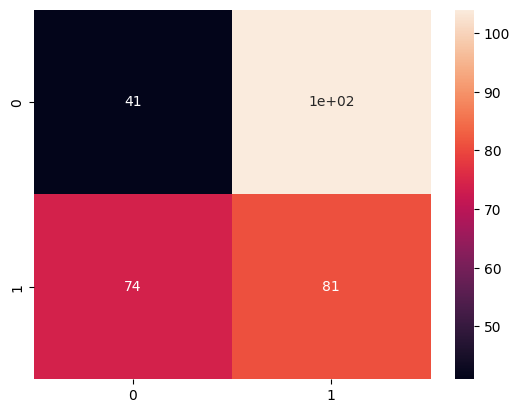

XGBoost
F1 Score:  0.5408805031446541


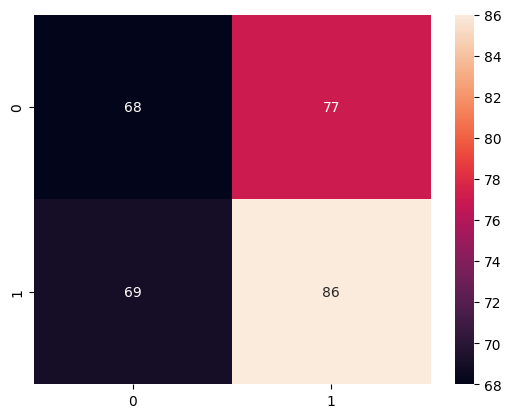

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, r2_score

import warnings
warnings.filterwarnings('ignore')

models= {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost' : XGBClassifier()
}

for name,model in models.items():
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    print(name)
    print('F1 Score: ',f1_score(Y_test,ypred))
    sns.heatmap(confusion_matrix(Y_test,ypred),annot=True)
    plt.show()

Debido a la versalitidad de XGboost, si bien dió mejor resultado inicial en la comparación de los 3, para mejorar los resultados obtenidos nos apoyamos en herramientas de inteligencia artificial, para que nos ayude a dar con hiperparámetros que se ejecuten en el modelo, dándonos así un mejor resultado en F1 Score y Matriz de Confusión:

Mejor XGBoost - F1 Score:  0.5813333333333334


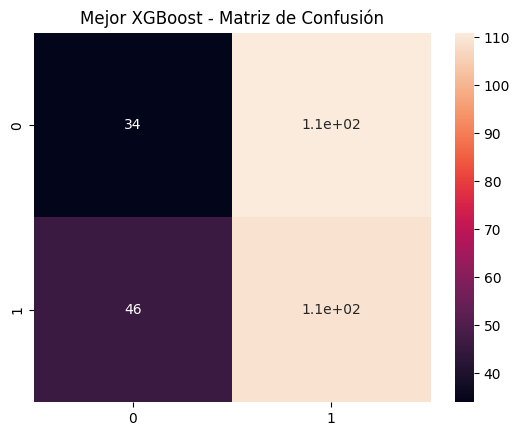

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, Y_train)

best_xgb = grid_search.best_estimator_
ypred_best = best_xgb.predict(X_test)

print('Mejor XGBoost - F1 Score: ', f1_score(Y_test, ypred_best))
sns.heatmap(confusion_matrix(Y_test, ypred_best), annot=True)
plt.title('Mejor XGBoost - Matriz de Confusión')
plt.show()


<font size=5>En resumen, estos modelos pueden ser muy efectivos para predecir el riesgo de un ataque al corazón en personas con diabetes, considerando otros factores del dataset. La clave está en entrenar bien los modelos, ajustar los hiperparámetros y evaluar su rendimiento utilizando métricas como el F1 Score y la matriz de confusión. Esto te permitirá identificar el modelo que mejor se adapta a tus datos y proporciona las predicciones más precisas.